In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn.decomposition
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
import os

In [2]:
MergedData0 = pd.read_csv('Data.csv', index_col=0);
MergedData1 = MergedData0.iloc[:, :-1]
y = pd.read_csv("bladder_training_genes_set.csv", index_col='gene')
y.rename_axis("DepMap_ID")
y = y == 'positive'
data = MergedData1.merge(y, how='inner', left_index=True, right_index=True)
Data = data.iloc[:, :-1]
y = data.iloc[:, -1]
display(Data)
display(y)

,ACH-000001_x,ACH-000004_x,ACH-000005_x,ACH-000007_x,ACH-000009_x,ACH-000011_x,ACH-000012_x,ACH-000013_x,ACH-000014_x,ACH-000015_x,...,ACH-001578,ACH-000036,ACH-000973,ACH-001128,ACH-000750,ACH-000285,ACH-002669,ACH-001858,ACH-001997,ACH-000052
A2ML1,0.025962,0.033215,0.005448,0.011299,0.011721,0.003488,0.002901,0.009602,0.015126,0.017902,...,2.805292,0.000000,0.014355,0.000000,0.014355,0.042644,0.000000,0.014355,0.250962,3.187451
ABAT,0.069781,0.016261,0.132199,0.006714,0.017307,0.052493,0.092392,0.047019,0.103188,0.073438,...,2.480265,0.454176,2.207893,1.495695,0.028569,1.372952,0.505891,2.253989,1.867896,3.680324
ABAT,0.069781,0.016261,0.132199,0.006714,0.017307,0.052493,0.092392,0.047019,0.103188,0.073438,...,2.480265,0.454176,2.207893,1.495695,0.028569,1.372952,0.505891,2.253989,1.867896,3.680324
ACRBP,0.033464,0.066090,0.004191,0.021421,0.071012,0.036759,0.009306,0.010147,0.077407,0.060633,...,0.731183,0.526069,0.097611,0.495695,0.124328,1.650765,1.310340,0.310340,1.007196,3.190615
ACRBP,0.033464,0.066090,0.004191,0.021421,0.071012,0.036759,0.009306,0.010147,0.077407,0.060633,...,0.731183,0.526069,0.097611,0.495695,0.124328,1.650765,1.310340,0.310340,1.007196,3.190615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF639,0.022571,0.010000,0.010698,0.095480,0.044647,0.132459,0.020875,0.029781,0.034463,0.017341,...,6.418865,4.408032,5.246788,3.929791,4.460087,5.639232,5.031219,4.554589,4.718636,4.916477
ZNF75A,0.098515,0.124787,0.043134,0.131118,0.041215,0.274883,0.155210,0.112361,0.068937,0.073185,...,4.481557,4.582556,3.624101,4.759156,3.653060,5.632559,1.144046,2.879706,3.481557,4.179511
ZNF75A,0.098515,0.124787,0.043134,0.131118,0.041215,0.274883,0.155210,0.112361,0.068937,0.073185,...,4.481557,4.582556,3.624101,4.759156,3.653060,5.632559,1.144046,2.879706,3.481557,4.179511
ZSCAN21,0.029882,0.037909,0.150118,0.020868,0.066558,0.015406,0.049785,0.035902,0.156008,0.048246,...,4.189034,3.477677,3.161888,3.682573,2.829850,4.139142,3.510962,3.106013,3.321928,3.757023


A2ML1      False
ABAT       False
ABAT       False
ACRBP      False
ACRBP      False
           ...  
ZNF639     False
ZNF75A     False
ZNF75A     False
ZSCAN21    False
ZSCAN25    False
Name: label, Length: 693, dtype: bool

In [3]:
data_gene_dep = Data.iloc[:, 0:1086]
data_gene_dep;
data_gene_eff = Data.iloc[:, 1087:2172]
data_gene_eff;
data_express = Data.iloc[:, 2173:3578]
data_express;

In [4]:
pca = sklearn.decomposition.PCA(n_components=8, svd_solver='randomized')
X1 = pca.fit_transform(data_gene_dep)
print(pca.explained_variance_ratio_)

[0.8783706  0.00631948 0.00528113 0.00461122 0.00363315 0.00333401
 0.003062   0.00287346]


In [5]:
pca = sklearn.decomposition.PCA(n_components=8, svd_solver='randomized')
X2 = pca.fit_transform(data_gene_eff)
print(pca.explained_variance_ratio_)

[0.92189725 0.00651425 0.0039385  0.00280187 0.00252517 0.00230055
 0.0019854  0.00177553]


In [6]:
pca = sklearn.decomposition.PCA(n_components=8, svd_solver='randomized')
X3 = pca.fit_transform(data_express)
print(pca.explained_variance_ratio_)

[0.80729064 0.02727207 0.02502088 0.01373563 0.00634261 0.00550459
 0.00443939 0.00396117]


In [7]:
X4 = np.concatenate((X1, X2, X3), axis=1)
print(X4.shape)

(693, 24)


(292, 24)
(292,)
140


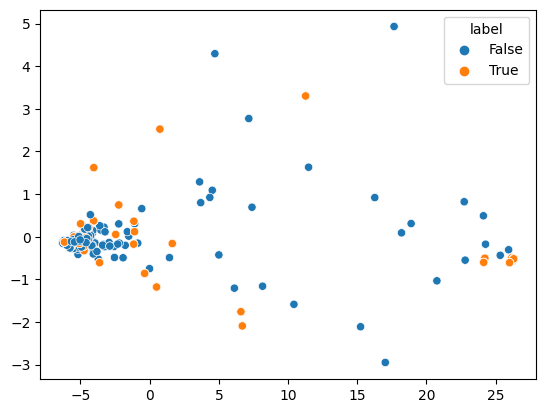

In [8]:
select = np.maximum(y, np.random.rand(len(y)) < sum(y)/(len(y) - sum(y)))
X4 = X4[select]
y = y[select]
print(X4.shape)
print(y.shape)
print(sum(y))
sns.scatterplot(x= X4[:,0], y=X4[:,1], hue=y)
plt.show()

In [9]:
# Get the training and test data
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.3)

# Fit the model
model = LogisticRegression(max_iter=10000).fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_rt = model.predict_proba(X_test)[:, 1]

accuracy = str(accuracy_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rt)
auc_value = str(auc(fpr, tpr))
precision = str(precision_score(y_test, y_pred))
recall = str(recall_score(y_test, y_pred))
f1score = str(f1_score(y_test, y_pred, average="weighted"))

Accuracy:0.8068181818181818
Precision:0.8787878787878788
Recall:0.6904761904761905


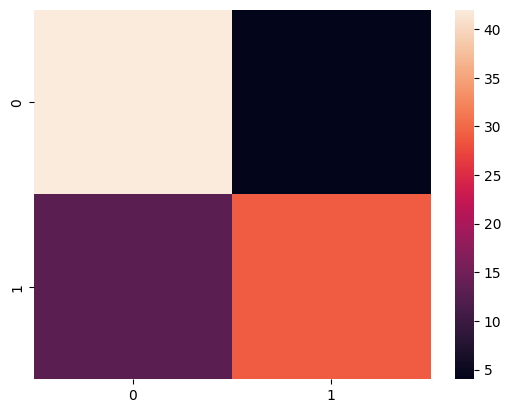

[[42  4]
 [13 29]]


In [10]:
print("Accuracy:" + accuracy)
print("Precision:" + precision)
print("Recall:" + recall)

conf_mx = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mx)
plt.show()

print(conf_mx)

In [11]:
keras.backend.clear_session()
np.random.seed(50)
tf.random.set_seed(50)

In [12]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[24]),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(8, activation="softmax")
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 24)                0         
                                                                 
 dense (Dense)               (None, 150)               3750      
                                                                 
 dense_1 (Dense)             (None, 75)                11325     
                                                                 
 dense_2 (Dense)             (None, 8)                 608       
                                                                 
Total params: 15,683
Trainable params: 15,683
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [16]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_test, y_test),
                    callbacks=[expon_lr])

Epoch 1/5
7/7 [==============================] - 3s 224ms/step - loss: 8.5281 - accuracy: 0.1667 - val_loss: 2.8462 - val_accuracy: 0.4659
Epoch 2/5
7/7 [==============================] - 0s 81ms/step - loss: 2.2624 - accuracy: 0.4461 - val_loss: 1.6258 - val_accuracy: 0.5455
Epoch 3/5
7/7 [==============================] - 1s 216ms/step - loss: 1.3011 - accuracy: 0.5588 - val_loss: 2.2508 - val_accuracy: 0.4318
Epoch 4/5
7/7 [==============================] - 1s 101ms/step - loss: 1.6334 - accuracy: 0.5343 - val_loss: 1.5480 - val_accuracy: 0.5795
Epoch 5/5
7/7 [==============================] - 1s 111ms/step - loss: 1.5728 - accuracy: 0.5980 - val_loss: 1.4331 - val_accuracy: 0.5909


Text(0, 0.5, 'Loss')

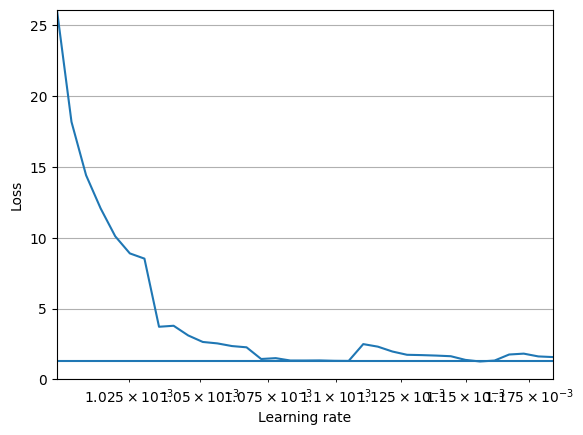

In [17]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [18]:
print("Min Loss: " + str(min(expon_lr.losses)))
print("Best learning rate: " + str(expon_lr.rates[np.argmin(expon_lr.losses)]))
alpha = expon_lr.rates[np.argmin(expon_lr.losses)];

Min Loss: 1.261244535446167
Best learning rate: 0.001155622


In [19]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, callbacks
keras.backend.clear_session()
np.random.seed(50)
tf.random.set_seed(50)

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[24]),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(8, activation="softmax")
])

In [21]:
#Using optimized learning rate: 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=alpha),
              metrics=["accuracy"])

In [22]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "bladdertypes_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\bladdertypes_logs\\run_001'

In [23]:
early_stopping_cb = keras.callbacks.EarlyStopping(
    min_delta=0.0005, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
)
checkpoint_cb = keras.callbacks.ModelCheckpoint("bladdertypes_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/200
7/7 [==============================] - 2s 118ms/step - loss: 5.9858 - accuracy: 0.3039 - val_loss: 1.5881 - val_accuracy: 0.4886
Epoch 2/200
7/7 [==============================] - 0s 43ms/step - loss: 1.3922 - accuracy: 0.6176 - val_loss: 1.4634 - val_accuracy: 0.6023
Epoch 3/200
7/7 [==============================] - 0s 48ms/step - loss: 1.0640 - accuracy: 0.6373 - val_loss: 1.6251 - val_accuracy: 0.5000
Epoch 4/200
7/7 [==============================] - 0s 63ms/step - loss: 1.0412 - accuracy: 0.6324 - val_loss: 0.7867 - val_accuracy: 0.6136
Epoch 5/200
7/7 [==============================] - 0s 62ms/step - loss: 0.7697 - accuracy: 0.7157 - val_loss: 0.9528 - val_accuracy: 0.6477
Epoch 6/200
7/7 [==============================] - 0s 41ms/step - loss: 0.7475 - accuracy: 0.7206 - val_loss: 0.8448 - val_accuracy: 0.5795
Epoch 7/200
7/7 [==============================] - 0s 49ms/step - loss: 0.7865 - accuracy: 0.6912 - val_loss: 0.6896 - val_accuracy: 0.6477
Epoch 8/200
7/7 [==

In [24]:
model = keras.models.load_model("bladdertypes_model.h5") # rollback to best model
model.evaluate(X_test, y_test)
model.evaluate(X_train, y_train)

7/7 [==============================] - 0s 3ms/step - loss: 0.1083 - accuracy: 0.9706


[0.10834743827581406, 0.970588207244873]

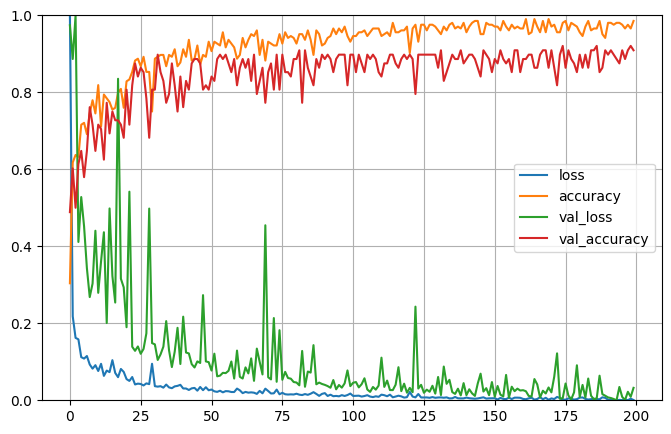

In [25]:
#Plot of Loss, Val_Loss, Accuracy and Val_Accuracy, with loss and val_loss normalized by max and min
hist = pd.DataFrame(history.history)#.plot(figsize=(8, 5))
hist['loss'] = (hist['loss'] - hist['loss'].min()) / (hist['loss'].max() - hist['loss'].min())
hist['val_loss'] = (hist['val_loss'] - hist['val_loss'].min()) / (hist['val_loss'].max() - hist['val_loss'].min())
hist.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
 
plt.show()